# Import Libraries

In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import folium

import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

from scipy.interpolate import griddata

from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pickle as pkl

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
curr_dir = (os.getcwd()).replace('\\', '/')
data_path = (os.path.join(curr_dir, 'Data')).replace('\\', '/')

In [4]:
str_sed_data = pd.read_csv(data_path + '/3 clusters/new_stream_sediments_57F11.csv')

In [5]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,u,pt,pd,toposheet,in_,f,te,tl,hg,cd
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,3.016905,0,0,57F11,0,0,0,0,8.0,50
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,3.378550,0,0,57F11,0,0,0,0,9.0,50
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,3.509000,0,0,57F11,0,0,0,0,2.5,50
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,4.241000,0,0,57F11,0,0,0,0,19.0,50
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,4.218000,0,0,57F11,0,0,0,0,19.0,50


In [16]:
## Before handling outliers
str_sed_data_pre_outl = pd.read_csv(data_path + '/new_stream_sediments_57F11_1.csv')

# EDA

- Outliers handled data

In [23]:
str_elem = []

for col in list(str_sed_data.columns):
    if col not in ['gid', 
                   'objectid', 
                   'sampleno', 
                   'longitude', 
                   'latitude', 
                   'toposheet']:
        str_elem.append(col)

str_elem_df = str_sed_data[str_elem]

In [24]:
str_elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,tm,yb,lu,hf,ta,w,u,hg,cd,cluster
0,61.921,14.606,4.51,0.05,2.28,3.24,1.52,2.46,0.61,0.13,...,0.359742,2.290226,0.413697,26.874492,0.677483,2.5,3.016905,8.0,50.0,2
1,62.077,13.750,4.22,0.05,2.43,4.14,1.52,2.55,0.64,0.12,...,0.419132,2.891123,0.500104,37.079419,0.774466,2.5,3.378550,9.0,50.0,2
2,68.645,13.410,3.02,0.05,1.32,3.19,2.89,3.08,0.75,0.08,...,0.329000,2.323000,0.423000,23.652000,0.715000,2.5,3.509000,2.5,50.0,1
3,64.950,14.280,3.46,0.05,1.75,3.10,2.34,2.82,0.60,0.12,...,0.306000,2.186000,0.400000,21.961000,0.744000,2.5,4.241000,15.0,50.0,1
4,64.302,14.010,4.08,0.05,1.84,3.24,2.12,2.83,0.75,0.16,...,0.334000,2.322000,0.431000,26.705000,0.832000,2.5,4.218000,15.0,50.0,2


- Data before handling outliers

In [14]:
str_elem_df_old = str_sed_data_pre_outl[str_elem]
str_elem_df_old['cluster'] = str_elem_df_old['cluster'] + 1
str_elem_df_old.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,tm,yb,lu,hf,ta,w,u,hg,cd,cluster
0,61.921,14.606,4.51,0.05,2.28,3.24,1.52,2.46,0.61,0.13,...,0.359742,2.290226,0.413697,26.874492,0.677483,2.5,3.016905,8.0,50,3
1,62.077,13.750,4.22,0.05,2.43,4.14,1.52,2.55,0.64,0.12,...,0.419132,2.891123,0.500104,37.079419,0.774466,2.5,3.378550,9.0,50,3
2,68.645,13.410,3.02,0.05,1.32,3.19,2.89,3.08,0.75,0.08,...,0.329000,2.323000,0.423000,23.652000,0.715000,2.5,3.509000,2.5,50,2
3,64.950,14.280,3.46,0.05,1.75,3.10,2.34,2.82,0.60,0.12,...,0.306000,2.186000,0.400000,21.961000,0.744000,2.5,4.241000,19.0,50,2
4,64.302,14.010,4.08,0.05,1.84,3.24,2.12,2.83,0.75,0.16,...,0.334000,2.322000,0.431000,26.705000,0.832000,2.5,4.218000,19.0,50,3


## Concentration of elements in each cluster

- Plot before handling outliers

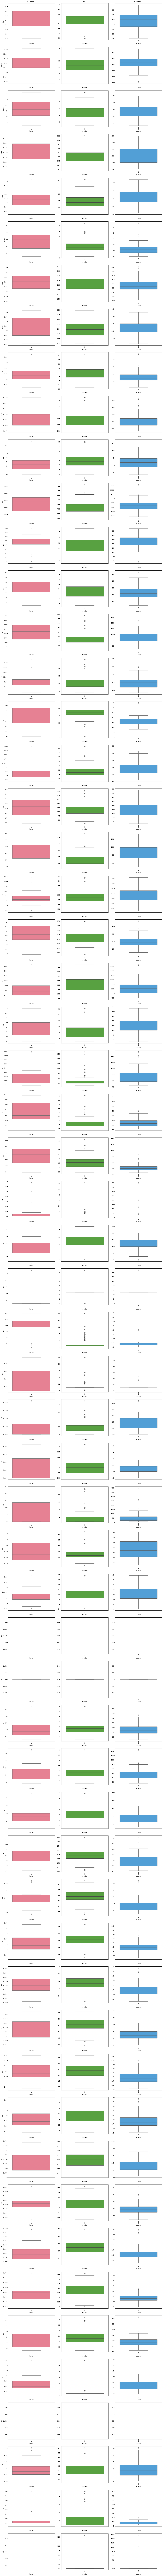

In [15]:
n_elem = len(str_elem_df_old.columns) - 1
n_clstr = len(str_elem_df_old['cluster'].unique())
# col_pal = ['#bfeeff', '#a8c5dd', '#a9a2b8', '#a58b91']
col_pal = sns.color_palette("husl", n_clstr)

fig, axes = plt.subplots(nrows=n_elem, 
                         ncols=n_clstr, 
                         figsize=(15, 4 * n_elem))

# If only one row or one column, axes need to be reshaped into a 2D array for consistency in indexing
if n_elem == 1:
    axes = np.expand_dims(axes, 
                          axis=0)
if n_clstr == 1:
    axes = np.expand_dims(axes, 
                          axis=1)

# Loop through each element
for i, element in enumerate(str_elem_df_old.columns[:-1]):  # assuming the last column is 'cluster'
    for cluster in range(1, n_clstr+1):
        # Filter data for the current cluster
        cluster_data = str_elem_df_old[str_elem_df_old['cluster'] == cluster]
        
        # Create boxplot for the current element in the current cluster subplot
        sns.boxplot(x='cluster', 
                    y=element, 
                    data=cluster_data, 
                    ax=axes[i, cluster-1], 
                    palette=[col_pal[cluster-1]])
        
        # Set titles and labels appropriately
        if i == 0:
            axes[i, cluster-1].set_title(f'Cluster {cluster}')
        if cluster == 1:
            axes[i, cluster-1].set_ylabel(element)
        else:
            axes[i, cluster-1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

- Plot after handling outliers

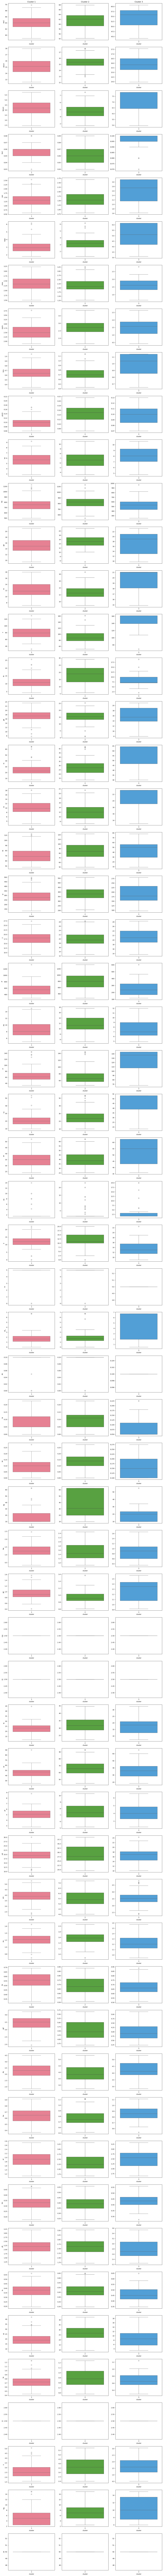

In [25]:
n_elem = len(str_elem_df.columns) - 1
n_clstr = len(str_elem_df['cluster'].unique())
# col_pal = ['#bfeeff', '#a8c5dd', '#a9a2b8', '#a58b91']
col_pal = sns.color_palette("husl", n_clstr)

fig, axes = plt.subplots(nrows=n_elem, 
                         ncols=n_clstr, 
                         figsize=(15, 4 * n_elem))

# If only one row or one column, axes need to be reshaped into a 2D array for consistency in indexing
if n_elem == 1:
    axes = np.expand_dims(axes, 
                          axis=0)
if n_clstr == 1:
    axes = np.expand_dims(axes, 
                          axis=1)

# Loop through each element
for i, element in enumerate(str_elem_df.columns[:-1]):  # assuming the last column is 'cluster'
    for cluster in range(1, n_clstr+1):
        # Filter data for the current cluster
        cluster_data = str_elem_df[str_elem_df['cluster'] == cluster]
        
        # Create boxplot for the current element in the current cluster subplot
        sns.boxplot(x='cluster', 
                    y=element, 
                    data=cluster_data, 
                    ax=axes[i, cluster-1], 
                    palette=[col_pal[cluster-1]])
        
        # Set titles and labels appropriately
        if i == 0:
            axes[i, cluster-1].set_title(f'Cluster {cluster}')
        if cluster == 1:
            axes[i, cluster-1].set_ylabel(element)
        else:
            axes[i, cluster-1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

## Heatmap for dominant elements among clusters

In [26]:
cluster_mean = str_elem_df.groupby('cluster')[str_elem].mean()
cluster_mean.drop(['cluster'], axis=1, inplace=True)

In [27]:
cluster_mean

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,er,tm,yb,lu,hf,ta,w,u,hg,cd
cluster,,,,,,,,,,,,,,,,,,,,,
1,64.134144,15.184946,4.202742,0.056989,1.356774,3.035860,2.352473,2.534194,0.656559,0.101559,...,1.932405,0.326715,2.185198,0.376138,19.908009,0.737926,2.5,2.636303,5.940860,50.0
2,61.761479,15.278227,4.759800,0.061867,1.596000,3.253267,2.167733,2.723733,0.729733,0.148000,...,2.371204,0.399596,2.665796,0.468616,27.132206,0.903041,2.5,3.751726,7.553333,50.0
3,54.389223,15.905114,7.176571,0.095429,2.581000,5.043286,1.586857,1.477714,0.984143,0.098286,...,2.501142,0.430116,2.811871,0.459815,9.081608,0.688446,2.5,1.656552,10.371429,50.0


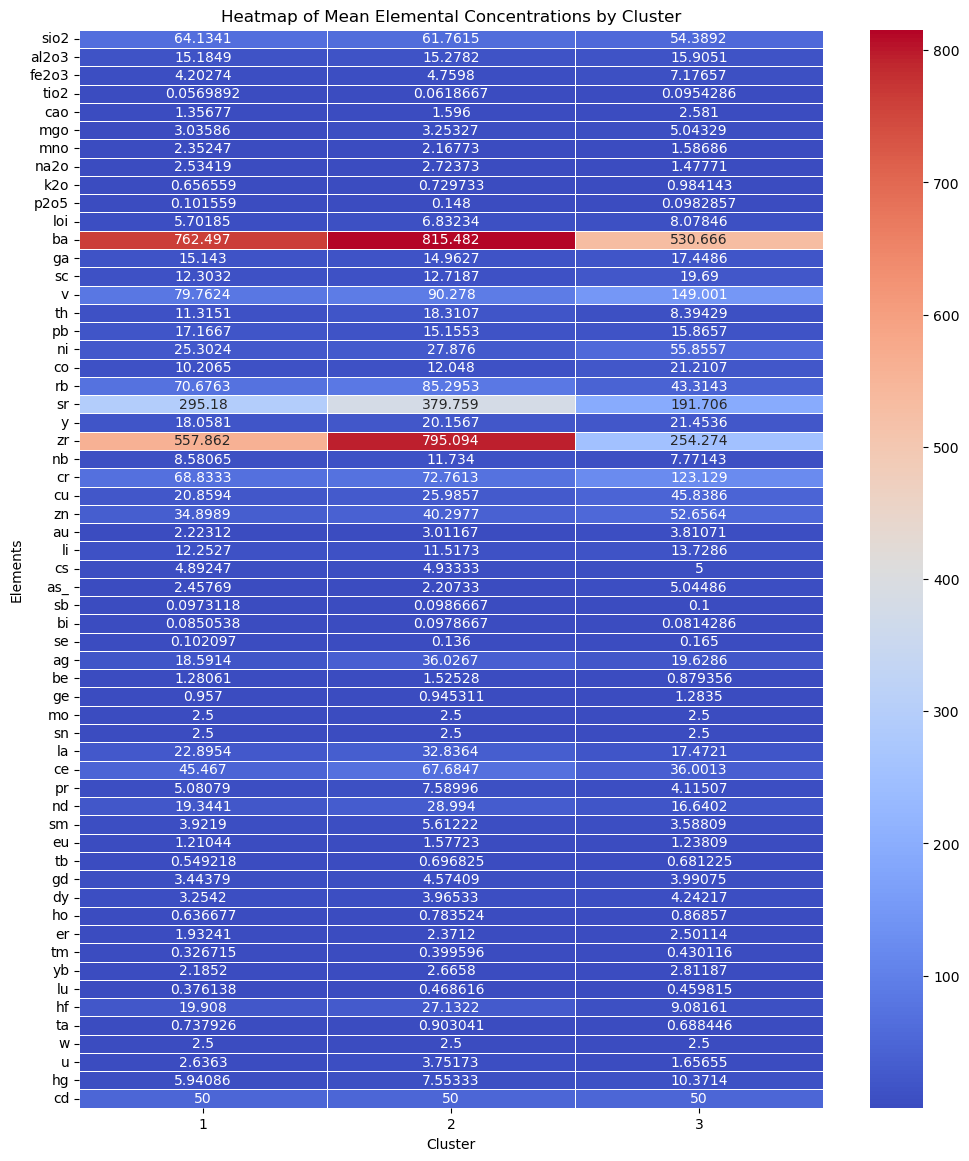

In [28]:
plt.figure(figsize=(12, 14))
heatmap = sns.heatmap(cluster_mean.T, 
                      annot=True, 
                      cmap='coolwarm', 
                      linewidths=.5, 
                      fmt='g')
heatmap.set_title('Heatmap of Mean Elemental Concentrations by Cluster')
heatmap.set_xlabel('Cluster')
heatmap.set_ylabel('Elements')
plt.show()

- Dominant elements in each cluster before handling outliers

In [12]:
elem_clstr_df = pd.DataFrame(columns=['clutser 1', 'clutser 2', 'clutser 3'])
elem_clstr_df.loc[0] = ['Vanadium', np.NaN, 'Strontium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Arsenic', np.NaN, 'Barium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Chromium', np.NaN, 'Zirconium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Nickel', np.NaN, 'Neodymium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Gallium', np.NaN, 'Rubidium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Copper', np.NaN, 'Praseodymium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Zinc', np.NaN, 'Silver']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Scandium', np.NaN, 'Cerium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Cobalt', np.NaN, 'Thorium']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Gold', np.NaN, 'Lanthanum']
elem_clstr_df.loc[len(elem_clstr_df.index)] = ['Mercury', np.NaN, 'Hafnium']

In [13]:
elem_clstr_df

,clutser 1,clutser 2,clutser 3
0,Vanadium,NaN,Strontium
1,Arsenic,NaN,Barium
2,Chromium,NaN,Zirconium
3,Nickel,NaN,Neodymium
4,Gallium,NaN,Rubidium
5,Copper,NaN,Praseodymium
6,Zinc,NaN,Silver
7,Scandium,NaN,Cerium
8,Cobalt,NaN,Thorium
9,Gold,NaN,Lanthanum


- Dominant elements in each cluster after handling outliers

> 3 Cluster table

In [30]:
elem_3clstr_df = pd.DataFrame(columns=['clutser 1', 'element 1', 'concentration1(in ppm)', 
                                       'clutser 2', 'element 2', 'concentration2(in ppm)', 
                                       'clutser 3', 'element 3', 'concentration3(in ppm)'])
elem_3clstr_df.loc[0] = ['Lead', 'pb', np.NaN, 'Barium', 'ba', np.NaN, 'Gallium', 'ga', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Thorium', 'th', np.NaN, 'Arsenic', 'as_', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Rubidium', 'rb', np.NaN, 'Chromium', 'cr', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Zirconium', 'zr', np.NaN, 'Copper', 'cu', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Neodymium', 'nd', np.NaN, 'Nickel', 'ni', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Praseodymium', 'pr', np.NaN, 'Scandium', 'sc', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Silver', 'ag', np.NaN, 'Zinc', 'zn', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Cerium', 'ce', np.NaN, 'Cobalt', 'co', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Lanthanum', 'la', np.NaN, 'Gold', 'au', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Hafnium', 'hf', np.NaN, 'Mercury', 'hg', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Niobium', 'nb', np.NaN, 'Vanadium', 'v', np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Strontium', 'sr', np.NaN, np.NaN, np.NaN, np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Uranium', 'u', np.NaN, np.NaN, np.NaN, np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, 'Samarium', 'sm', np.NaN, np.NaN, np.NaN, np.NaN]
elem_3clstr_df.loc[len(elem_3clstr_df.index)] = [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]

In [31]:
elem_3clstr_df

,clutser 1,element 1,concentration1(in ppm),clutser 2,element 2,concentration2(in ppm),clutser 3,element 3,concentration3(in ppm)
0,Lead,pb,NaN,Barium,ba,NaN,Gallium,ga,NaN
1,NaN,NaN,NaN,Thorium,th,NaN,Arsenic,as_,NaN
2,NaN,NaN,NaN,Rubidium,rb,NaN,Chromium,cr,NaN
3,NaN,NaN,NaN,Zirconium,zr,NaN,Copper,cu,NaN
4,NaN,NaN,NaN,Neodymium,nd,NaN,Nickel,ni,NaN
5,NaN,NaN,NaN,Praseodymium,pr,NaN,Scandium,sc,NaN
6,NaN,NaN,NaN,Silver,ag,NaN,Zinc,zn,NaN
7,NaN,NaN,NaN,Cerium,ce,NaN,Cobalt,co,NaN
8,NaN,NaN,NaN,Lanthanum,la,NaN,Gold,au,NaN
9,NaN,NaN,NaN,Hafnium,hf,NaN,Mercury,hg,NaN


In [14]:
clstr1_elem_df = cluster_mean[cluster_mean.index == 0][['v', 'as_', 'cr', 'ni', 'ga', 'cu', 'zn', 'sc', 'co', 'au', 'hg']]
clstr2_elem_df = cluster_mean[cluster_mean.index == 2][['sr', 'ba', 'zr', 'nd', 'rb', 'pr', 'ag', 'ce', 'th', 'la', 'hf']]

In [15]:
clstr1_elem_df

,v,as_,cr,ni,ga,cu,zn,sc,co,au,hg
cluster,,,,,,,,,,,
0,320.131818,20.060909,289.140909,92.231818,18.936364,65.654545,65.3,24.640909,36.727273,20.613636,16.772727


In [16]:
clstr2_elem_df

,sr,ba,zr,nd,rb,pr,ag,ce,th,la,hf
cluster,,,,,,,,,,,
2,388.29726,832.106849,842.473973,29.389561,85.875342,7.68695,55.246575,68.574088,19.539726,33.281071,28.702119


In [17]:
clstr1_df = str_sed_data[str_sed_data['cluster'] == 0][['gid', 'longitude', 'latitude'] + list(clstr1_elem_df.columns) + ['cluster']]
clstr1_df.reset_index(inplace=True, drop='index')
clstr1_df.head()

,gid,longitude,latitude,v,as_,cr,ni,ga,cu,zn,sc,co,au,hg,cluster
0,3604,77.509259,14.259009,347.0,24.0,883.0,249.0,20.0,75.0,61.0,26.0,54.0,16.0,15.0,0
1,3605,77.527778,14.259009,500.0,26.0,317.0,105.0,20.0,74.0,92.0,26.0,46.0,20.0,11.0,0
2,3606,77.546296,14.259009,353.0,21.0,357.0,101.0,22.0,56.0,71.0,24.0,41.0,1.5,10.0,0
3,3689,77.509259,14.277027,479.0,24.0,315.0,104.0,26.0,92.0,83.0,29.0,51.0,1.5,35.0,0
4,3690,77.527778,14.277027,382.0,30.0,293.0,81.0,20.0,57.0,77.0,23.0,37.0,1.5,10.0,0


In [18]:
clstr2_df = str_sed_data[str_sed_data['cluster'] == 2][['gid', 'longitude', 'latitude'] + list(clstr2_elem_df.columns) + ['cluster']]
clstr2_df.reset_index(inplace=True, drop='index')
clstr2_df.head()

,gid,longitude,latitude,sr,ba,zr,nd,rb,pr,ag,ce,th,la,hf,cluster
0,2947,77.657407,14.475225,375.7,826.5,695.4,31.887143,74.2,8.555444,25,72.232300,16.6,37.722005,26.874492,2
1,2948,77.675926,14.475225,465.2,836.2,826.1,28.995136,73.3,7.586066,24,63.086789,17.0,31.134342,37.079419,2
2,2951,77.731481,14.475225,405.8,770.5,1001.3,25.004000,86.8,6.659000,23,56.014999,23.1,27.639000,26.705000,2
3,2956,77.564815,14.493242,283.4,772.2,453.7,23.953863,63.6,6.265094,137,56.112010,9.8,26.657001,22.014712,2
4,2957,77.583333,14.493242,238.3,591.5,425.9,24.316941,64.8,6.554683,34,60.067221,9.3,29.094922,16.354219,2


## Contour Maps

In [139]:
def plot_contour(df, element, title):

    min_lat_limit = min(df['latitude']) - 0.005
    max_lat_limit = max(df['latitude']) + 0.005
    min_long_limit = min(df['longitude']) - 0.005 
    max_long_limit = max(df['longitude']) + 0.005

    grid_x, grid_y = np.mgrid[
        min_long_limit:max_long_limit:100j,  # 100j specifies 100 points in grid
        min_lat_limit:max_lat_limit:100j
    ]

    # Grid interpolation
    grid_z = griddata(
        (df['longitude'], df['latitude']),
        df[element],
        (grid_x, grid_y),
        method='cubic'  # 'cubic' for smoother contour lines
    )

    cmap = LinearSegmentedColormap.from_list("green_to_red", ["green", "yellow", "red"])
    # Plotting
    plt.figure(figsize=(10, 8))
    cp = plt.contourf(grid_x, 
                      grid_y, 
                      grid_z, 
                      levels=15, 
                      cmap=cmap)  # contour map
    
    plt.colorbar(cp)  # add colorbar
    plt.title(f'{title}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.scatter(df['longitude'], 
                df['latitude'], 
                color='red', 
                label='Sample Points')  # data points
    plt.legend()

    for i, (x, y) in enumerate(zip(df['longitude'], df['latitude'])):
        plt.text(x, y, str(i+1), color='black', fontsize=8)
    
    plt.show()

### Contour map for Silver

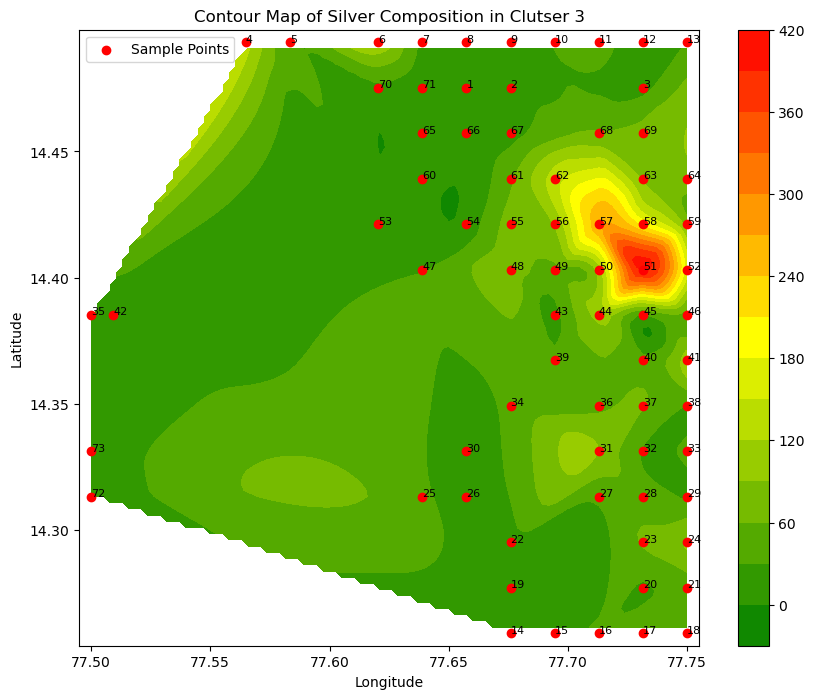

In [140]:
plot_contour(clstr2_df, 'ag', 'Contour Map of Silver Composition in Clutser 3')

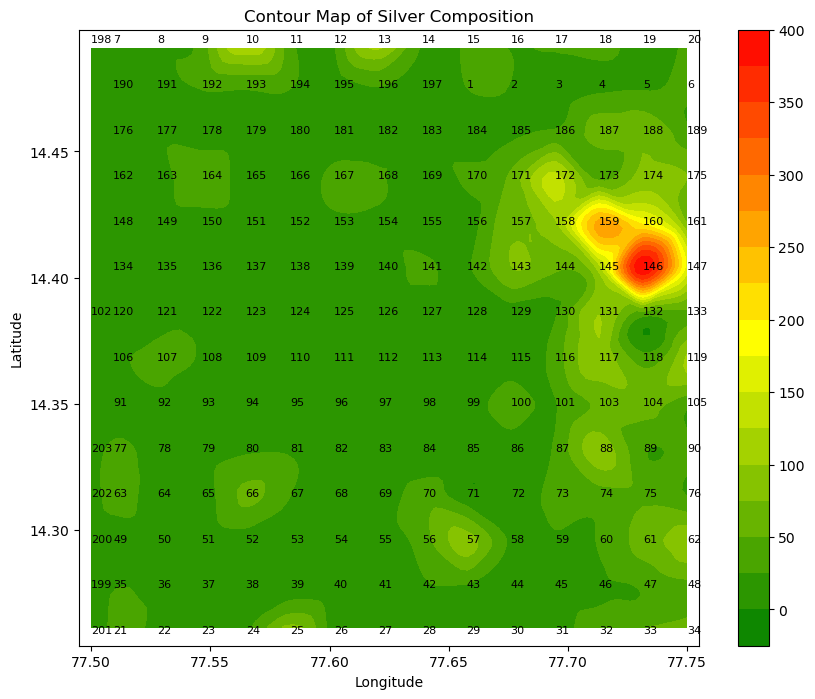

In [136]:
plot_contour(str_sed_data, 'ag', 'Contour Map of Silver Composition')

### Contour map for Arsenic

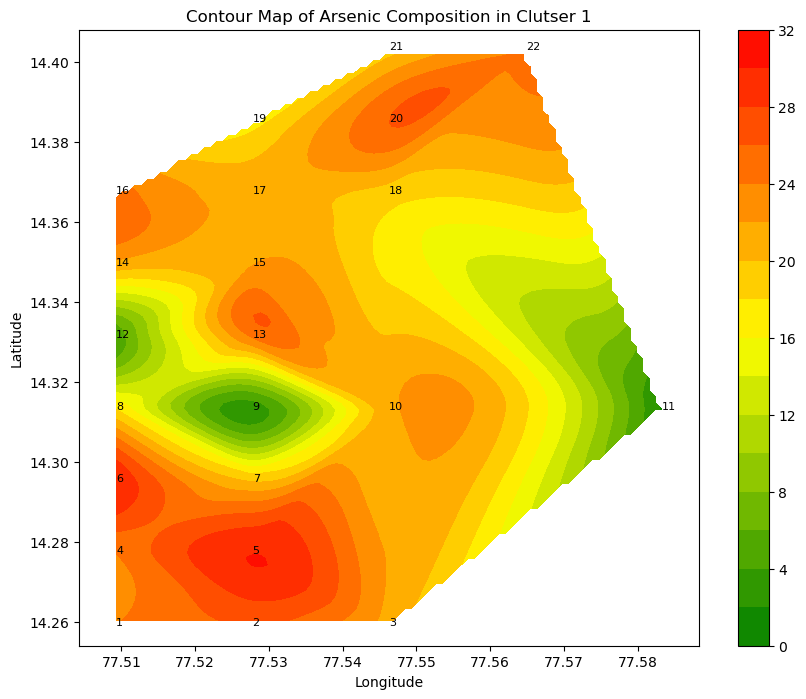

In [137]:
plot_contour(clstr1_df, 'as_', 'Contour Map of Arsenic Composition in Clutser 1')

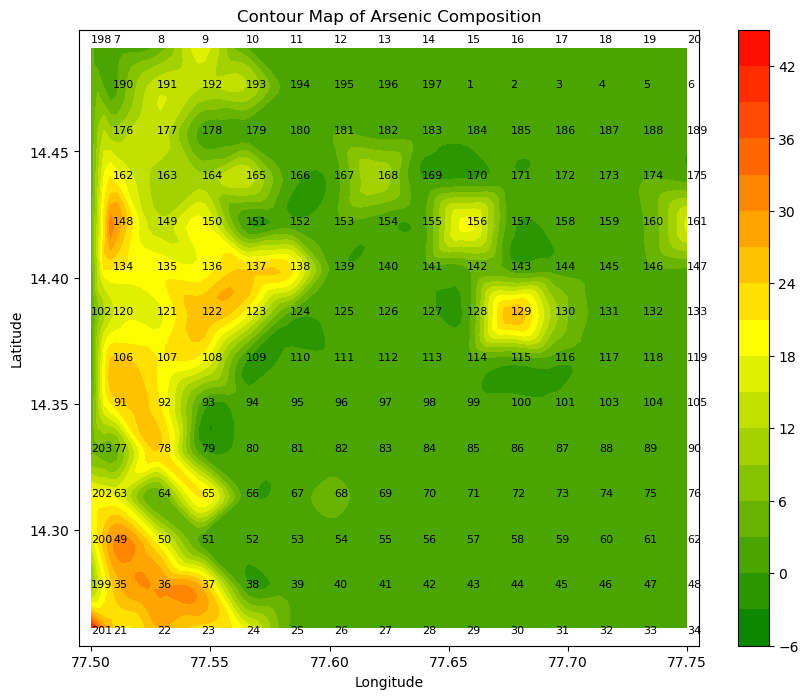

In [138]:
plot_contour(str_sed_data, 'as_', 'Contour Map of Arsenic Composition')